**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Multilayer Perceptron (MLP) with Keras

## 1. Set up

#### 1.1 TensorFlow + Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-03-16 19:25:47.322912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

**GPU available?**

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### 1.2 Fixing the seed for reproducibility (optional)
That's a try for reprodubility in Keras. See more on: <br/>
https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ <br/>
https://www.tensorflow.org/api_docs/python/tf/random/set_seed

In [5]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(42)
set_seed(42)

#### 1.3 Other imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.4 Loading Fashion MNIST Dataset via Keras
https://keras.io/api/datasets/fashion_mnist/

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

The dataset is already split into a training set and a test set.

In [8]:
# download done in folder: "~/.keras/datasets"
import os
os.listdir(os.path.expanduser('~/.keras/datasets'))

['mnist.npz', 'fashion-mnist']

In [9]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}\n')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)

X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
print(f'Number of Classes: {np.unique(y_train).shape[0]}')
print(f'Classes: {np.unique(y_train)}')

Number of Classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

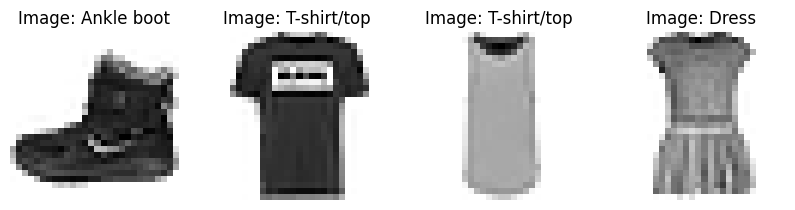

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'Image: {class_names[label]}')

In [17]:
# 8-bit gray scale
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

print(f'Min. value of X_test: {X_test.min()}')
print(f'Max. value of X_test: {X_test.max()}')

Min. value of X_train: 0
Max. value of X_train: 255

Min. value of X_test: 0
Max. value of X_test: 255


#### 1.5 (Simple) Feature scaling
Since we are going to train the neural network using _Gradient Descent_, we must scale the **input features**. For simplicity, we’ll scale the pixel intensities down to the _0–1_ range by dividing them by **255.0** (8-bit gray image):

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
# 8-bit gray scale
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

print(f'Min. value of X_test: {X_test.min()}')
print(f'Max. value of X_test: {X_test.max()}')

Min. value of X_train: 0.0
Max. value of X_train: 1.0

Min. value of X_test: 0.0
Max. value of X_test: 1.0


#### 1.6 Flattening the images as feature vectors

In [20]:
# X_train.shape ==> (n_train_imgs, img_width, img_height)
n_train_imgs, img_width, img_height = X_train.shape

# n_pixes == number of feats
n_pixels = img_width * img_height
n_pixels

784

In [21]:
# X_test.shape ==> (n_test_imgs, img_width, img_height)
n_test_imgs = X_test.shape[0]
n_test_imgs

10000

In [22]:
# 60000, 28, 28 ===> 60000, 784
X_train = np.reshape(X_train, (n_train_imgs, n_pixels))

# 10000, 28, 28 ===> 10000, 784
X_test = np.reshape(X_test, (n_test_imgs, n_pixels))

In [23]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)


## 2. Building and Training a MLP via Keras

### 2.1 Defining the Network Architecture
Proposed architecture for Multiclass Classification:
- Input Layer: 784 neurons (number of pixels)
- Hidden Layer 1: 256 neurons, ReLu
- Hidden Layer 2: 128 neurons, ReLu
- Output Layer: 10 neurons, Softmax

In short: [784], [256 ReLU, 128 ReLU], [10 Softmax] ==> pyramid

#### **Defining the Network's Architecture**

In [24]:
# Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# InputLayer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer
# Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

### Default weight and bias initialization:
# kernel_initializer='glorot_uniform',
# bias_initializer='zeros',

from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

model = Sequential()
model.add(InputLayer(input_shape=(n_pixels,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-03-16 19:39:36.005100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### **Summarizing Architecture**

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


##### **Creating a Model (archicture) from a list of Layers**

In [28]:
model = Sequential(
    layers=[
        InputLayer(input_shape=(n_pixels,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [31]:
model = Sequential([
        InputLayer(input_shape=(n_pixels,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [32]:
model = Sequential([
        Dense(256, activation='relu', input_shape=(n_pixels,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


##### **Named Layers (without spaces)**

In [35]:
# Optionally, we can define names for each layer and for the model
model = Sequential(name='MyMLP')
model.add(InputLayer(input_shape=(n_pixels,), name='Input'))
model.add(Dense(256, activation='relu', name='Hidden_1'))
model.add(Dense(128, activation='relu', name='Hidden_2'))
model.add(Dense(10, activation='softmax', name='Output'))

In [36]:
model.summary()

Model: "MyMLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### 2.2 Info about the Architecture

In [37]:
type(model)

keras.engine.sequential.Sequential

#### **List of layers (except the input layer)**

In [38]:
model.layers

#### **Getting a specific layer**

According to our convention:
- Layer 1: Input Layer
- Layer 2: Hidden Layer 1
- Layer 3: Hidden Layer 2
- Layer 4: Output Layer

In [41]:
hidden_1 = model.layers[0]
hidden_1

In [42]:
print(f'# of neurons/units: {hidden_1.units}')

# of neurons/units: 256


In [43]:
hidden_1.name

'Hidden_1'

In [44]:
hidden_1.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'Input')>

In [45]:
hidden_1.output

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'Hidden_1')>

In [46]:
hidden_1.activation

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

#### **Accessing the weights and biases of a layer**

PS: While the model is not trained, the layer's weights and biases come from the initialization

In [47]:
hidden_1

In [49]:
weights, biases = hidden_1.get_weights()

In [50]:
print('Hidden 1')
print(f'weights.shape = {weights.shape}')
print(f'biases.shape = {biases.shape}')

Hidden 1
weights.shape = (784, 256)
biases.shape = (256,)


**PS:** Note that the **Weight Matrix's shape** has a different _order/convention_ from what we have seen so far.

In [51]:
print(weights)

[[-0.03848871 -0.04634656  0.0537259  ...  0.00453672 -0.06285494
   0.02017101]
 [-0.05468823 -0.01894339 -0.02139134 ... -0.00347861 -0.02012902
  -0.01337277]
 [-0.05315357 -0.05320115 -0.05811667 ... -0.01265867 -0.06076793
  -0.05442214]
 ...
 [ 0.03988574 -0.00069561 -0.01975283 ...  0.05364312 -0.06276075
  -0.06523611]
 [-0.06489778  0.04470589  0.05540647 ...  0.07469817 -0.07456182
   0.00386228]
 [ 0.04956496 -0.03352408 -0.05055039 ...  0.05491981  0.00628447
   0.03604066]]


In [52]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **There are other getters (`get_`)**

In [54]:
hidden_1.get_config()

{'name': 'Hidden_1',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [58]:
hidden_1.get_input_at(0)

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'Input')>

In [59]:
hidden_1.get_output_at(0)

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'Hidden_1')>

**PS:** There are the corresponding setter methods (`set_`).

### 2.2 Compiling: Defining the Loss Function, Optimizer, and Metrics

In [60]:
# Model compilation: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### **Loss:**

We use the `"sparse_categorical_crossentropy"` loss because we have **sparse labels** (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are **exclusive**.

If instead we had _one target probability per class_ for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `"categorical_crossentropy"` loss instead.

If we were doing **binary classification** (with one or more binary labels), then we would use the `"sigmoid"` _activation function_ in the **output layer**, and we would use the `"binary_crossentropy"` loss.

#### **Optimizer:**

`"sgd"` means that we will train the model using simple **Stochastic Gradient Descent** with its default values (see https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD).<br/>
To change some default value, for example the _learning rate_, use `optimizer=keras.optimizers.SGD(lr=???)`.

There are other otimizers available in Keras: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### **Metrics:**
List of _metrics_ to be evaluated by the model during **training** and **testing**. <br/>
Each of this can be a _string_ (name of a built-in function), _function_ or a `tf.keras.metrics.Metric` instance: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

**PS:** By default, _F1 score_ **is not** part of keras metrics. To use it, we need to create our own function and pass it to `metrics`: https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d#:~:text=By%20default%2C%20f1%20score%20is,like%20accuracy%2C%20categorical%20accuracy%20etc. <br/>
Other option is to use [**TensorFlow Addons**](https://www.tensorflow.org/addons) that provides several additional functionalities to TensorFlow, such as [**F1 Score**](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score): https://stackoverflow.com/a/71705026/7069696



### 2.4 Training

In case of GPU drivers, we can monitor its use by [_gpustat_](https://github.com/wookayin/gpustat).

On terminal, use: `gpustat -cpi`


In [62]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4683 - accuracy: 0.8375 - val_loss: 0.4503 - val_accuracy: 0.8445
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4340 - accuracy: 0.8495 - val_loss: 0.4485 - val_accuracy: 0.8416
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4110 - accuracy: 0.8566 - val_loss: 0.4213 - val_accuracy: 0.8573
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8614 - val_loss: 0.3948 - val_accuracy: 0.8616
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8674 - val_loss: 0.3927 - val_accuracy: 0.8608
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3646 - accuracy: 0.8720 - val_loss: 0.3752 - val_accuracy: 0.8690
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3527 - accuracy: 0.8761 - val_loss: 0.3742 - val_accuracy:

<br/>

We are using a _validation set_ during training by the argument `validation_split`: https://www.tensorflow.org/api_docs/python/tf/distribute/experimental/ParameterServerStrategy
 <br/>
For example, `validation_split=0.2` tells Keras to use **the last** 20% of the data (before shuffling) for **validation**. <br/>

Additionally, the argument `validation_batch_size` tells the number of samples per **validation batch**. If _unspecified_, will default to `batch_size`.

#### **Checking the training history object**

In [63]:
history

In [64]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

In [ ]:
params

In [66]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [67]:
history.history

{'loss': [0.46825769543647766,
  0.43395406007766724,
  0.4110054671764374,
  0.393265962600708,
  0.3771434426307678,
  0.3646193742752075,
  0.35271385312080383,
  0.34476253390312195,
  0.3347579836845398,
  0.3269611895084381,
  0.31854283809661865,
  0.3131202459335327,
  0.3061816096305847,
  0.3004074692726135,
  0.294491171836853,
  0.2889903783798218,
  0.283717542886734,
  0.27867040038108826,
  0.272714227437973,
  0.2677532434463501,
  0.2643187940120697,
  0.2598939538002014,
  0.25658053159713745,
  0.25188595056533813,
  0.24731093645095825,
  0.24276576936244965,
  0.23998787999153137,
  0.23696653544902802,
  0.23252010345458984,
  0.22894035279750824],
 'accuracy': [0.8374791741371155,
  0.8494791388511658,
  0.8566250205039978,
  0.8613541722297668,
  0.8674166798591614,
  0.871999979019165,
  0.8761249780654907,
  0.8773958086967468,
  0.8811041712760925,
  0.8830833435058594,
  0.886062502861023,
  0.8868749737739563,
  0.8897291421890259,
  0.8921041488647461,
  0

#### **Visualizing the training history**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.468258,0.837479,0.450306,0.844500
1,0.433954,0.849479,0.448548,0.841583
2,0.411005,0.856625,0.421326,0.857333
3,0.393266,0.861354,0.394781,0.861583
4,0.377143,0.867417,0.392741,0.860750
5,0.364619,0.872000,0.375176,0.869000
6,0.352714,0.876125,0.374230,0.869667
7,0.344763,0.877396,0.381810,0.865250
8,0.334758,0.881104,0.363187,0.870583
9,0.326961,0.883083,0.359282,0.873167


Text(0, 0.5, 'Score')

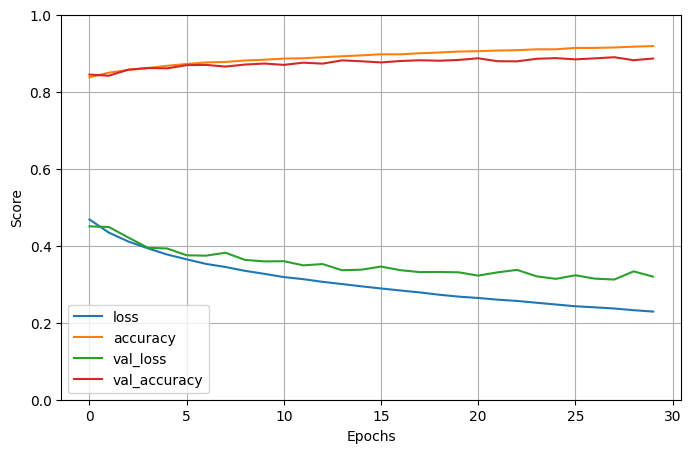

In [69]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.ylabel('Score')

The _training set_ performance ends up beating the _validation performance_, as is generally the case when you train for long enough. <br/>
You can tell that the model _has not quite converged yet_, as the _validation loss_ is still (or could be) going down, so you should probably
**continue training**.

It’s as simple as calling the `fit()` method again, since Keras **_just_ continues training where it left off**.

In [70]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2260 - accuracy: 0.9184 - val_loss: 0.3130 - val_accuracy: 0.8902
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2225 - accuracy: 0.9204 - val_loss: 0.3227 - val_accuracy: 0.8836
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2198 - accuracy: 0.9207 - val_loss: 0.3170 - val_accuracy: 0.8874
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2161 - accuracy: 0.9224 - val_loss: 0.3120 - val_accuracy: 0.8895
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2119 - accuracy: 0.9242 - val_loss: 0.3120 - val_accuracy: 0.8899
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2093 - accuracy: 0.9255 - val_loss: 0.3123 - val_accuracy: 0.8898
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2049 - accuracy: 0.9270 - val_loss: 0.3116 - val_accuracy:

Note that our _training loss_ is lower than that from the last epoch in the previous training. This confirms that our `fit()` method **continues training** where it left off.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.226020,0.918417,0.312982,0.890167
1,0.222543,0.920396,0.322712,0.883583
2,0.219777,0.920687,0.317036,0.887417
3,0.216067,0.922417,0.312016,0.889500
4,0.211880,0.924167,0.312048,0.889917
5,0.209269,0.925479,0.312264,0.889750
6,0.204936,0.927021,0.311639,0.890583
7,0.203726,0.926833,0.333806,0.888250
8,0.199695,0.928417,0.321749,0.883917
9,0.196313,0.930479,0.309502,0.889417


Text(0, 0.5, 'Score')

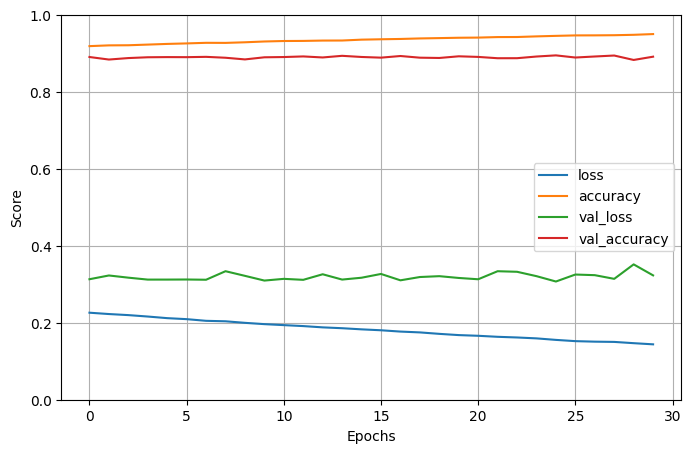

In [72]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.ylabel('Score')

#### **More about training in Keras**
Extracted from "A. Géron, Hands-on Machine Learning (Chapter 10)".

If the training set was _very skewed_, with some classes being _overrepresented_ and others _underrepresented_, it would be useful to set the `class_weight` argument when calling the `fit()` method, which would give a **larger weight** to _underrepresented classes_ and a **lower weight** to _overrepresented classes_. These weights would be used by Keras when _computing the loss_.

If you need _per-instance weights_, set the `sample_weight` argument (if both `class_weight` and `sample_weight` are provided, Keras **multiplies them**).

_Per-instance weights_ could be useful if some instances were labeled by _experts_ while others were labeled using a _crowdsourcing platform_: you might want to give more weight to the former.

#### **Saving a Model**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save

In [73]:
model.save('./models/mlp_keras_fashionmnist_v1.h5')

See also:
- `save_spec`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save_spec
- `save_weights`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save_weights

#### **Loading a Model**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#example_8

In [74]:
from tensorflow.keras.models import load_model

loaded_model = load_model('./models/mlp_keras_fashionmnist_v1.h5')

In [75]:
loaded_model.summary()

Model: "MyMLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


See also:
- `load_weights`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#load_weights

### 2.5 Evaluating and Predicting New Samples

#### **Evaluation**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate

#### **Prediction**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict

#### **Class Prediction**
https://stackoverflow.com/a/69503180/7069696

# Exercise

Repeat all steps shown in this notebook for the MNIST dataset available in Keras: <br/>
https://keras.io/api/datasets/mnist/